In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go


In [143]:
train_data = pd.read_csv("train.csv")
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [110]:
# train_data = pd.concat([train_data[train_data["Response"] == 0][:12000], train_data[train_data["Response"] == 1][:10000]])
# train_data.head()

In [144]:
#have limit for data shape
print(train_data.shape)
train_data.head()

(381109, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [112]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(train_data.drop(["Response", "id", "Previously_Insured"], axis=1), train_data["Response"], test_size=0.2, random_state=42)

# X_train.shape

In [113]:
# train_csv = X_train.join(y_train)
# train_csv.shape

In [114]:
# train_csv.to_csv("my_train.csv")

In [115]:
# test_csv = X_test.join(y_test)
# test_csv.to_csv("my_val.csv")
# test_csv.head()

In [116]:
# train_csv

In [117]:
# plt.figure(figsize=(10,10))
# sns.heatmap(train_csv.corr(), vmin=-1, cmap='coolwarm', annot=True);

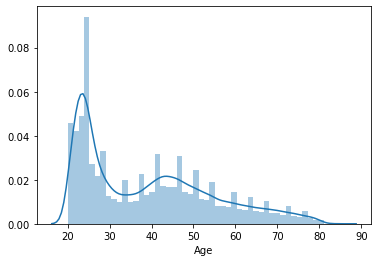

In [118]:
sns.distplot(train_data["Age"])

#### Age 20-30 and 40-50 is high

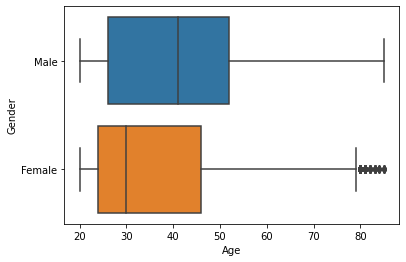

In [119]:
sns.boxplot(train_data["Age"], y=train_data["Gender"])

### Feature engineering

In [120]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data["Gender"] = encoder.fit_transform(train_data["Gender"])

# train_data['Gender'][train_data['Gender'] == 'Male'] = 0
# train_data['Gender'][train_data['Gender'] == 'Female'] = 1

train_data["Vehicle_Age"] = encoder.fit_transform(train_data["Vehicle_Age"])

# train_data['Vehicle_Age'][train_data['Vehicle_Age'] == '< 1 Year'] = 0
# train_data['Vehicle_Age'][train_data['Vehicle_Age'] == '1-2 Year'] = 1
# train_data['Vehicle_Age'][train_data['Vehicle_Age'] == '> 2 Years'] = 2

train_data["Vehicle_Damage"] = encoder.fit_transform(train_data["Vehicle_Damage"])

# train_data['Vehicle_Damage'][train_data['Vehicle_Damage'] == 'No'] = 0
# train_data['Vehicle_Damage'][train_data['Vehicle_Damage'] == 'Yes'] = 1

In [121]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [122]:
train_data.Annual_Premium[train_data.Annual_Premium > 200000] = train_data.Annual_Premium.mean()
# test_data.Annual_Premium[test_data.Annual_Premium > 200000] = train_data.Annual_Premium.mean()

<ipython-input-122-e363f6828614>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
train_data = train_data.drop(['Driving_License'], axis = 1)

In [124]:
train_data.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,41.0,1,1,0,27496.0,152.0,39,0


### Try to predict response

In [139]:
from sklearn.preprocessing import PolynomialFeatures

X = train_data.drop(["Response", "id"], axis=1)
y = train_data["Response"]

# X = PolynomialFeatures(2).fit_transform(X)
print(X.shape)

(381109, 9)


In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.95, random_state=42)

X_train.shape

(19055, 9)

In [161]:
train_csv = X_train.join(y_train)
train_csv.to_csv("my_train.csv")
print(train_csv.shape)
train_csv

test_csv = X_test[:10000].join(y_test[:10000])
test_csv.to_csv("my_val.csv")
print(test_csv.shape)

(19055, 10)
(10000, 10)


In [153]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression(solver="liblinear")
print("Start fitting...")
log_reg.fit(X_train, y_train)
print("Done.")

# rfc = RandomForestClassifier()
# print("Start RFC")
# rfc.fit(X_train, y_train)
# print("Done")

Start fitting...
Done.


In [154]:
model_pred = log_reg.predict(test_csv.drop("Response", axis=1))
acc = accuracy_score(test_csv["Response"], model_pred)
acc

0.8668

### Got 0.77 on LogReg. 

### UPD: Updated to 0.91 ROC AUC accuracy score (I'm fool, didn't drop "id")

### Try to XGBClassifier

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10],
    "solver" : ["liblinear"]}
print(param_grid)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear']}


In [157]:
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [158]:
grid.best_estimator_

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [159]:
grid.best_score_

0.8791393335082655

### Test on Test set

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.771